In [11]:
!pip install matplotlib

In [1]:
!pip install textblob
from textblob import TextBlob

In [2]:
import pandas
import glob

In [3]:
file_pattern = "*.csv"
file_list = glob.glob(file_pattern)
dataframes = []
file_list.sort()
for file_name in file_list:
  df = pandas.read_csv(file_name)
  dataframes.append(df)

In [4]:
def polarity_only(review):
  analysis = TextBlob(review)
  score = analysis.sentiment.polarity
  return score

In [5]:
for i in range(len(dataframes)):
  print(dataframes[i].shape)

(222, 13)
(204, 13)
(219, 13)
(200, 13)
(495, 13)
(1152, 13)
(705, 13)
(1000, 13)
(1221, 13)
(247, 13)
(246, 13)


In [6]:
for i in range(len(dataframes)):
  dataframes[i] = dataframes[i].dropna(subset=['Content'])
  dataframes[i].drop(dataframes[i][dataframes[i]['Likes'] > 0].index, inplace=True)
  print(dataframes[i].shape)

(101, 13)
(93, 13)
(72, 13)
(66, 13)
(215, 13)
(573, 13)
(396, 13)
(500, 13)
(590, 13)
(95, 13)
(109, 13)


<ipython-input-6-c9c65fc3cdf6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframes[i].drop(dataframes[i][dataframes[i]['Likes'] > 0].index, inplace=True)


In [7]:
for i in range(len(dataframes)):
  dataframes[i]['score_only'] = dataframes[i]['Content'].apply(lambda x: polarity_only(x))
  print(dataframes[i].shape)

(101, 14)
(93, 14)
(72, 14)
(66, 14)
(215, 14)
(573, 14)
(396, 14)
(500, 14)
(590, 14)
(95, 14)
(109, 14)


<ipython-input-7-237695e076a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframes[i]['score_only'] = dataframes[i]['Content'].apply(lambda x: polarity_only(x))


In [9]:
values = []

In [10]:
for i in range(len(dataframes)):
  print(dataframes[i]['score_only'].mean())
  values.append(dataframes[i]['score_only'].mean())

0.07315337843308141
0.05815442248909992
0.09681292087542087
0.03085056462897372
0.08730932488054581
0.07167435830226697
0.07315953642721883
0.045478683381433384
0.050334536905354235
0.06962200153647523
0.04251975373254581


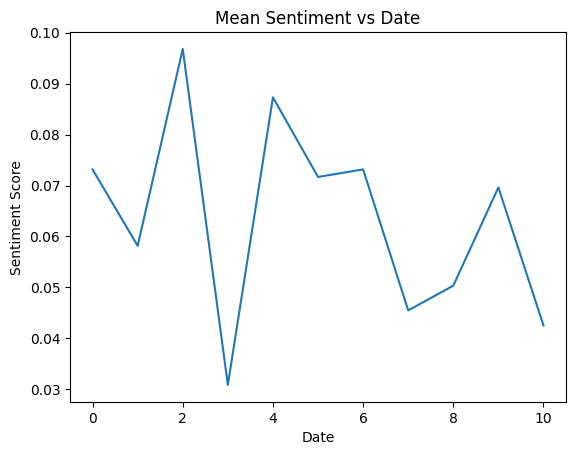

In [12]:
import matplotlib.pyplot as plt

plt.plot(values)
plt.title("Mean Sentiment vs Date")
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.show()